In [23]:
import h5py
import numpy as np
import skimage as sk
#print sk.__version__
from skimage import io
from matplotlib import pyplot as plt

In [24]:
from skimage import filters
from skimage import feature
from skimage import io
from scipy import ndimage as nd
from scipy import misc

In [25]:
h5f = h5py.File('LowRes_13434_overlapping_pairs.h5','r')
pairs = h5f['dataset_1'][:]
h5f.close()

In [26]:
pairs.shape
pairs[0,:,:,0].dtype
pairs[0,:,:,0].max()

209

In [27]:
subset = pairs[::2,:,:,:]
subset.shape

(6717, 94, 93, 2)

In [28]:
h5f = h5py.File('overlapping_subset_pairs.h5', 'w')
h5f.create_dataset('dataset_1', data= subset)
h5f.close()

## Loading a subset of the overlapping examples

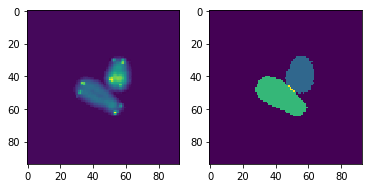

In [29]:
h5f = h5py.File('overlapping_subset_pairs.h5','r')
subset = h5f['dataset_1'][:]
h5f.close()
grey = subset[10,:,:,0]
mask = subset[10,:,:,1]
%matplotlib inline
plt.subplot(121)
plt.imshow(grey)
plt.subplot(122)
plt.imshow(mask)

### Try to convert greyscale into uint8

In [30]:
def toUint8(array4):
    a = array4/16
    a.astype(np.int8)

In [31]:
sub25 = np.copy(subset[0:24,:,:,:])
print (sub25.shape, sub25.dtype)

(24, 94, 93, 2) int64


In [32]:
greys = pairs[:,:,:,0]
masks = pairs[:,:,:,1]
g_ex1 = greys[200,:,:]
m_ex1 = masks[200,:,:]



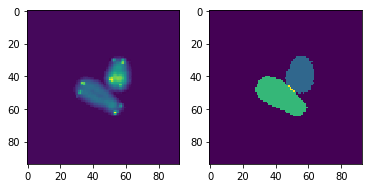

In [33]:
%matplotlib inline
plt.subplot(121)
plt.imshow(grey)
plt.subplot(122)
plt.imshow(mask)

In [34]:
np.apply_along_axis(
    func1d=lambda x: subset[:,:,:,0]/16,
    axis=1,
    arr=dat[:2,0])

NameError: name 'data' is not defined

In [35]:
gabs = filters.gabor(g_ex1, 0.2)
images = []
factors = [2.0, 1.5, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
for i,k in enumerate(factors):
    images.append(misc.imresize(g_ex1, k))

/home/sara/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/sara/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [36]:
filters.gaussian(im, sigma=3)
from generator_tools import ResizeImages
plt.figure(figsize=(10,10))
for i,im in enumerate(images):
    plt.subplot(3,4,1+i, xticks=[],yticks=[])
    #plt.imshow(im, interpolation = 'nearest')
    plt.title(str(factors[i]))
    plt.imshow(filters.edges.laplace(im, ksize=3))


NameError: name 'im' is not defined